In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df = pd.read_csv('worldwide covid data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      207 non-null    object 
 1   Total Cases        207 non-null    int64  
 2   Total Deaths       207 non-null    int64  
 3   Total Recovered    194 non-null    float64
 4   Active Cases       194 non-null    float64
 5   Tot Cases/ 1M pop  207 non-null    int64  
 6   Deaths/ 1M pop     207 non-null    int64  
 7   Total Tests        201 non-null    float64
 8   Tests/ 1M pop      201 non-null    float64
 9   Population         207 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 16.3+ KB


In [4]:
df.columns

Index(['Country/Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests',
       'Tests/ 1M pop', 'Population'],
      dtype='object')

In [5]:
df.dtypes

Country/Other         object
Total Cases            int64
Total Deaths           int64
Total Recovered      float64
Active Cases         float64
Tot Cases/ 1M pop      int64
Deaths/ 1M pop         int64
Total Tests          float64
Tests/ 1M pop        float64
Population             int64
dtype: object

In [6]:
df = df.dropna()

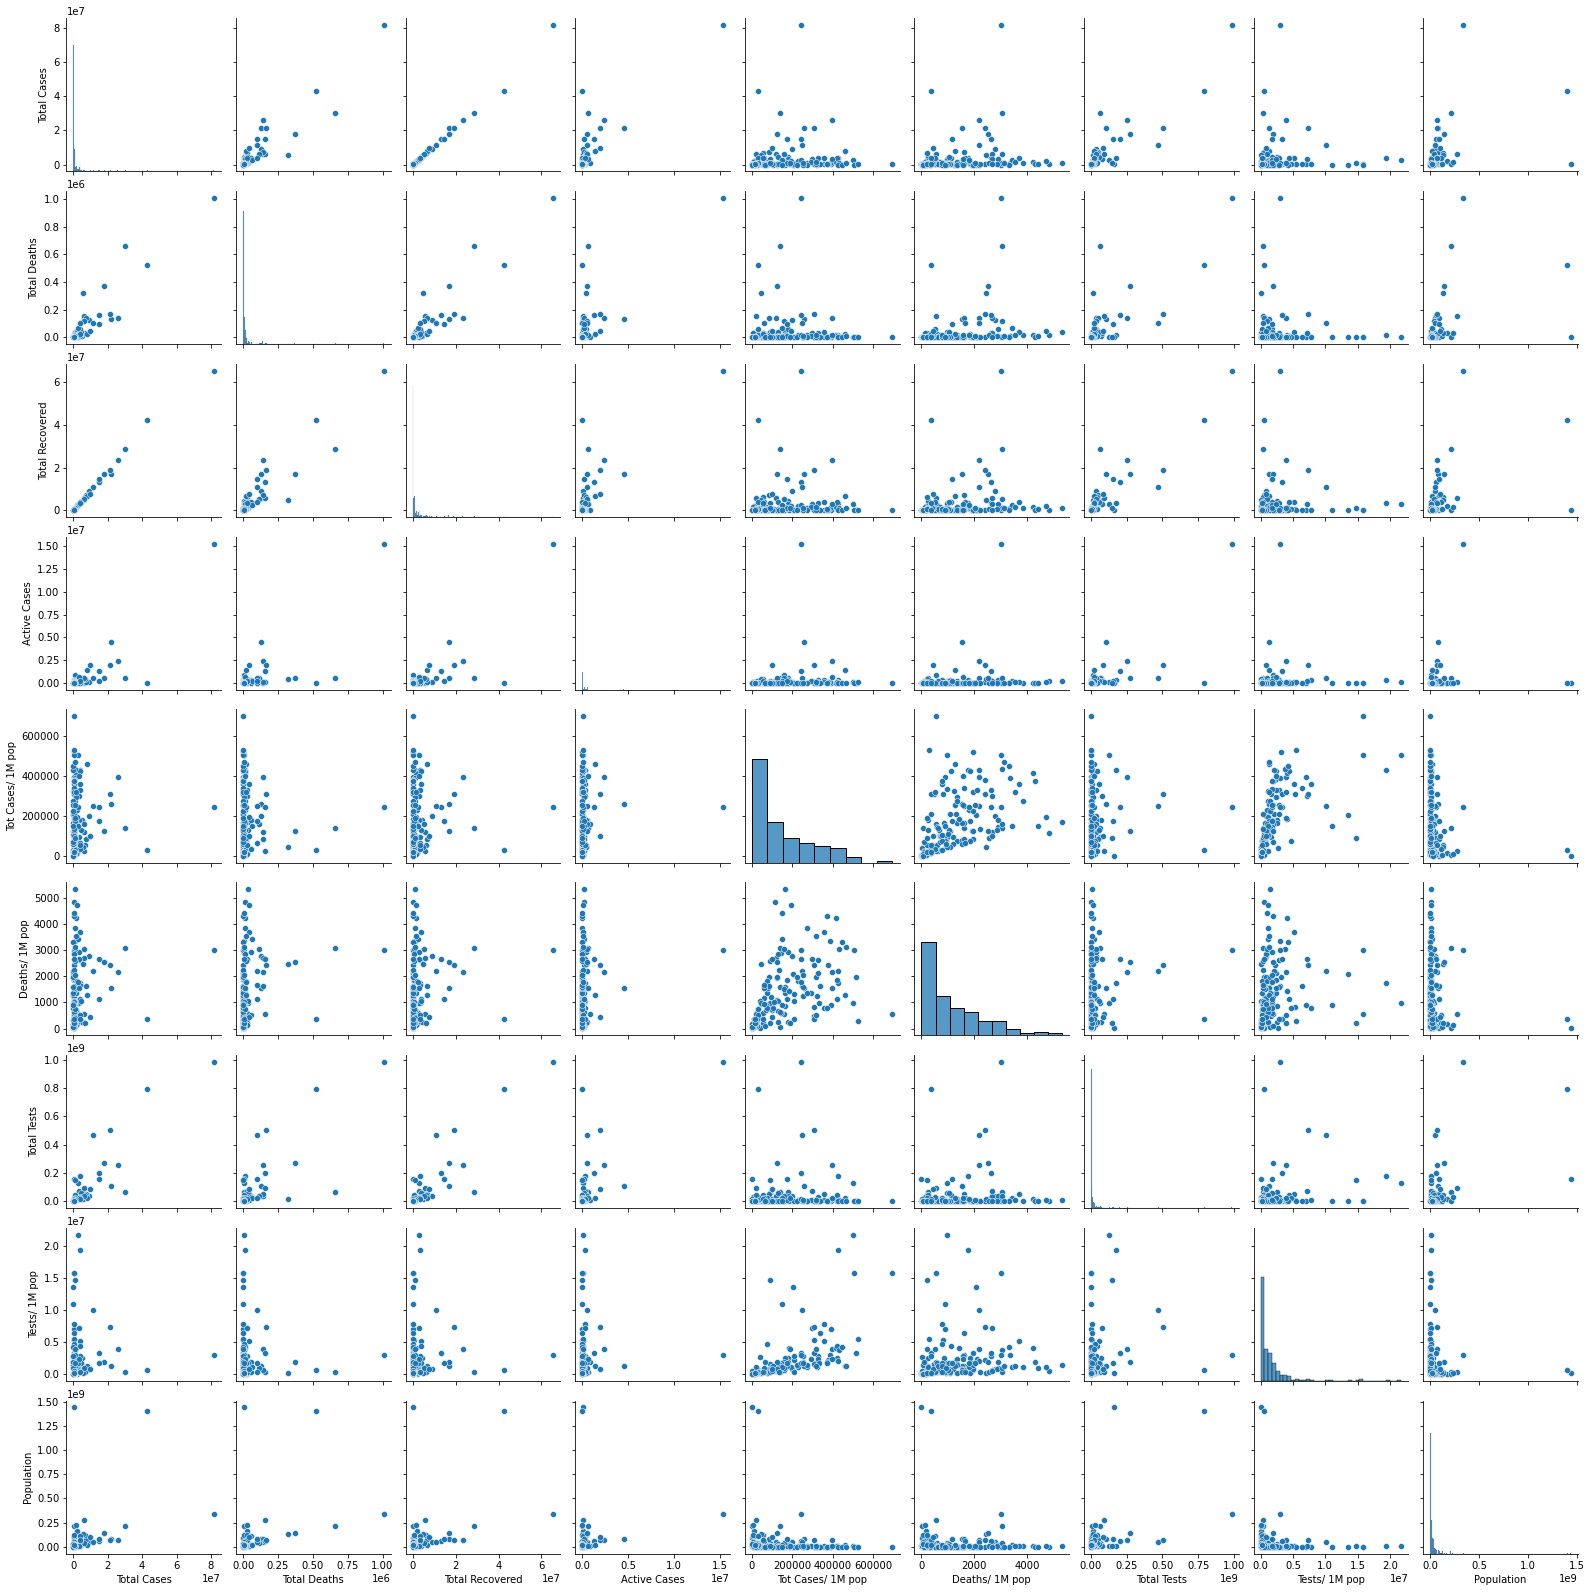

In [7]:
sns.pairplot(df.drop([], axis=1))

<AxesSubplot:>

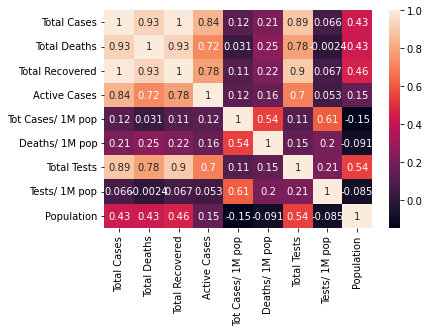

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
df.info('Country/Other')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 206
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      190 non-null    object 
 1   Total Cases        190 non-null    int64  
 2   Total Deaths       190 non-null    int64  
 3   Total Recovered    190 non-null    float64
 4   Active Cases       190 non-null    float64
 5   Tot Cases/ 1M pop  190 non-null    int64  
 6   Deaths/ 1M pop     190 non-null    int64  
 7   Total Tests        190 non-null    float64
 8   Tests/ 1M pop      190 non-null    float64
 9   Population         190 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 20.4+ KB


In [19]:
continent_lookup = {"Afghanistan": "asia",
"Albania": "europe",
"Algeria": "africa",
"Andorra": "europe",
"Angola": "africa",
"Antigua and Barbuda": "north america",
"Argentina": "south america",
"Aruba": "south america",
"Armenia": "asia",
"Australia": "australia",
"Austria": "europe",
"Azerbaijan": "europe",
"Bahamas": "north america",
"Bahrain": "asia",
"Bangladesh": "asia",
"Barbados": "north america",
"Belarus": "europe",
"Bermuda": "south america",
"Belgium": "europe",
"Belize": "north america",
"Benin": "africa",
"Bhutan": "south america",
"Bolivia": "south america",
"Bosnia and Herzegovina": "europe",
"Botswana": "africa",
"Brazil": "south america",
"Brunei": "asia",
"Bulgaria": "europe",
"Burkina Faso": "africa",
"Burundi": "africa",
"CAR": "africa",
"Cabo Verde": "africa",
"Cambodia": "asia",
"Cameroon": "africa",
"Canada": "north america",
"Caribbean Netherlands": "south america",
"Cayman Islands": "north america",
"Chad": "africa",
"Channel Islands": "europe",
"Chile": "south america",
"China": "asia",
"Colombia": "south america",
"Congo": "africa",
"Costa Rica": "north america",
"Croatia": "europe",
"Cuba": "north america",
"Curaçao": "south america",
"Cyprus": "europe",
"Czechia": "europe",
"DRC": "africa",
"Denmark": "europe",
"Djibouti": "africa",
"Dominica": "north america",
"Dominican Republic": "north america",
"Egypt": "africa",
"El Salvador": "north america",
"Equatorial Guinea": "africa",
"Eritrea": "africa",
"Estonia": "europe",
"Eswatini": "africa",
"Ethiopia": "africa",
'Faeroe Islands': "europe",
"Fiji": "australia",
"Finland": "europe",
"France": "europe",
"French Guiana": "south america",
"Gabon": "africa",
"Gambia": "africa",
"Georgia": "europe",
"Germany": "europe",
"Ghana": "africa",
"Gibraltar": "europe",
"Greece": "europe",
"Greenland": "north america",
"Grenada": "north america",
"Guadeloupe": "north american",
"Guatemala": "north america",
"Guinea": "africa",
"Guinea-Bissau": "africa",
"Guyana": "south america",
"Haiti": "north america",
"Honduras": "north america",
"Hungary": "europe",
"Iceland": "europe",
"India": "asia",
"Indonesia": "asia",
"Iran": "asia",
"Iraq": "asia",
"Ireland": "europe",
"Isle of Man": "europe",
"Israel": "asia",
"Italy": "europe",
"Ivory Coast": "africa",
"Jamaica": "africa",
"Japan": "asia",
"Jordan": "africa",
"Kazakhstan": "asia",
"Kenya": "africa",
"Kuwait": "asia",
"Kyrgyzstan": "asia",
"Laos": "asia",
"Latvia": "europe",
"Lebanon": "asia",
"Lesotho": "africa",
"Liberia": "africa",
"Libya": "africa",
"Liechtenstein": "europe",
"Lithuania": "europe",
"Luxembourg": "europe",
"Madagascar": "africa",
"Malawi": "africa",
"Malaysia": "asia",
"Maldives": "asia",
"Mali": "africa",
"Malta": "europe",
"Martinique": "north america",
"Mauritania": "africa",
"Mauritius": "africa",
"Mayotte": "africa",
"Mexico": "north america",
"Moldova": "europe",
"Monaco": "europe",
"Mongolia": "asia",
"Montenegro": "europe",
"Morocco": "africa",
"Mozambique": "africa",
"Myanmar": "asia",
"Namibia": "africa",
"Nepal": "asia",
"Netherlands": "europe",
"New Caledonia": "australia",
"New Zealand": "australia",
"Niger": "africa",
"Nigeria": "africa",
"North Macedonia": "europe",
"Oman": "asia",
"Pakistan": "asia",
"Palestine": "asia",
"Panama": "north america",
"Papua New Guinea": "australia",
"Paraguay": "south america",
"Philippines": "asia",
"Poland": "europe",
"Qatar": "asia",
"Romania": "europe",
"Russia": "europe",
"Rwanda": "africa",
"Réunion": "africa",
"Saint Kitts and Nevis": "north america",
"Saint Lucia": "north america",
"Saint Martin": "north america",
"San Marino": "europe",
"Sao Tome and Principe": "africa",
"Saudi Arabia": "asia",
"Senegal": "africa",
"Serbia": "europe",
"Singapore": "asia",
"Sint Maarten": "north america",
"Slovakia": "europe",
"Slovenia": "europe",
"Solomon Islands": "australia",
"Somalia": "africa",
"South Africa": "africa",
"South Sudan": "africa",
"Spain": "europe",
"Sri Lanka": "asia",
"St. Vincent Grenadines": "north america",
"Suriname": "south america",
"Sweden": "europe",
"Switzerland": "europe",
"Syria": "asia",
"Taiwan": "asia",
"Thailand": "asia",
"Timor-Leste": "asia",
"Togo": "africa",
"Tonga": "australia",
"Trinidad and Tobago": "south america",
"Turkey": "europe",
"Turks and Caicos": "north america",
"UAE": "asia",
"UK": "europe",
"USA": "north america",
"Uganda": "africa",
"Uruguay": "south america",
"Uzbekistan": "asia",
"Venezuela": "south america",
"Vietnam": "asia",
"Yemen": "asia",
"Zambia": "africa",
"Zimbabwe": "africa",
}

df['continent'] = df['Country/Other'].apply(lambda country: continent_lookup[country])


In [20]:
X = df[['Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests',
      'Tests/ 1M pop', 'Population']]
    
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

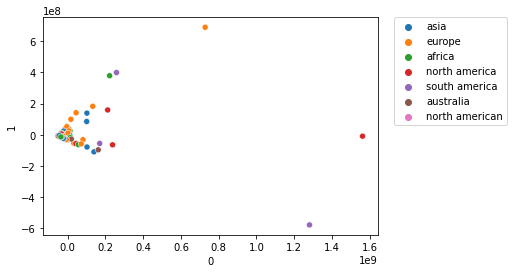

In [21]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['continent'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [ ]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Total Cases'])

In [ ]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

In [ ]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

In [ ]:
y = kmeans.fit_predict(X)

In [ ]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

In [ ]:
X = df[['Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests',
      'Tests/ 1M pop', 'Population']]

In [ ]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title('Dendrogram')
plt.xlabel('Covid Data')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  


In [ ]:
y_agglo = agglo.fit_predict(X)

In [ ]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y_agglo)